In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Harmonic problem

## 1D Results

In [80]:
df_hg1d = pd.read_csv('./harmonic-grid_conv_1d.csv', sep=';')
df_hg1d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,24.98
1,preonly,cholesky,500000,2,1.373080e-14,6.451984e-11,3.490265e-15,1.644727e-11,11.97
2,preonly,lu,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,12.49
3,preonly,lu,500000,2,1.373081e-14,6.451989e-11,3.490271e-15,1.644730e-11,11.77
4,preonly,bjacobi,500000,1,1.373079e-14,6.451978e-11,3.490258e-15,1.644724e-11,12.50


In [81]:
valid_L2_hg1d = df_hg1d.iloc[df_hg1d.loc[(df_hg1d['solver'] == 'preonly') 
                                         & (df_hg1d['pc'] == 'lu')]['N'].idxmax()]['L2_r']
valid_L2_hg1d

1.3730788703444992e-14

In [82]:
df_hg1d = df_hg1d[np.isclose(df_hg1d['L2_r'], valid_L2_hg1d, atol=1e-15)]
df_hg1d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,24.98
1,preonly,cholesky,500000,2,1.373080e-14,6.451984e-11,3.490265e-15,1.644727e-11,11.97
2,preonly,lu,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,12.49
3,preonly,lu,500000,2,1.373081e-14,6.451989e-11,3.490271e-15,1.644730e-11,11.77
4,preonly,bjacobi,500000,1,1.373079e-14,6.451978e-11,3.490258e-15,1.644724e-11,12.50


In [83]:
N = 500000
f1_hg1d = df_hg1d.loc[df_hg1d['N'] == N]
f1_hg1d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,24.98
1,preonly,cholesky,500000,2,1.373080e-14,6.451984e-11,3.490265e-15,1.644727e-11,11.97
2,preonly,lu,500000,1,1.373079e-14,6.451978e-11,3.490257e-15,1.644724e-11,12.49
3,preonly,lu,500000,2,1.373081e-14,6.451989e-11,3.490271e-15,1.644730e-11,11.77
4,preonly,bjacobi,500000,1,1.373079e-14,6.451978e-11,3.490258e-15,1.644724e-11,12.50


In [84]:
f2_hg1d = f1_hg1d.pivot_table(values=['time'], 
                              columns=['np'], 
                              index=['solver', 'pc'], 
                              aggfunc='min').loc[:, 'time']
f2_hg1d

np                    1      2
solver  pc                    
gcr     asm       11.93   6.42
        bjacobi   13.05   6.23
        cholesky  12.78   9.87
        lu        12.75  10.42
gmres   asm       13.01   6.01
        bjacobi   12.39    NaN
        cholesky  12.66  10.96
        lu        12.22  12.07
preonly asm       12.69    NaN
        bjacobi   12.50    NaN
        cholesky  24.98  11.97
        lu        12.49  11.77

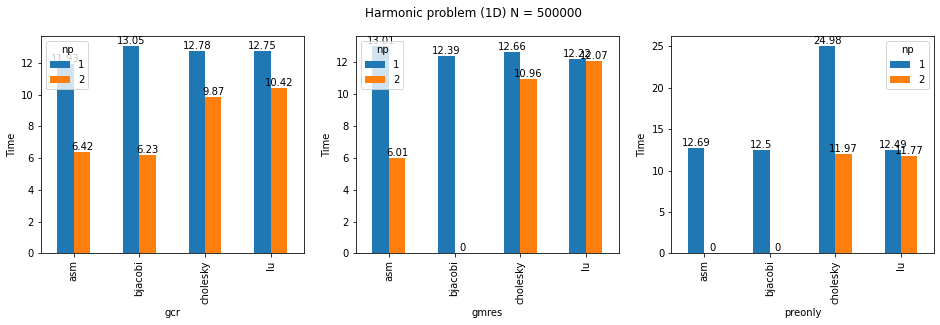

In [85]:
solvers = f2_hg1d.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Harmonic problem (1D) N = {N}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_hg1d.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [93]:
f3_solver, f3_pc = 'gcr', 'asm'

In [94]:
f3_col1 = df_hg1d.groupby(['solver', 'pc', 'N', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_hg1d = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_hg1d.columns = ['Time', 'Speed up', 'Efficiency']

f3_hg1d

Time  Speed up  Efficiency
N       np                             
125000  1    8.93  1.000000    1.000000
        2    6.42  1.390966    0.695483
250000  1    8.93  1.000000    1.000000
        2    4.42  2.020362    1.010181
500000  1   11.93  1.000000    1.000000
        2    6.42  1.858255    0.929128
1000000 1   21.93  1.000000    1.000000
        2   12.42  1.765700    0.882850
        4    8.42  2.604513    0.651128

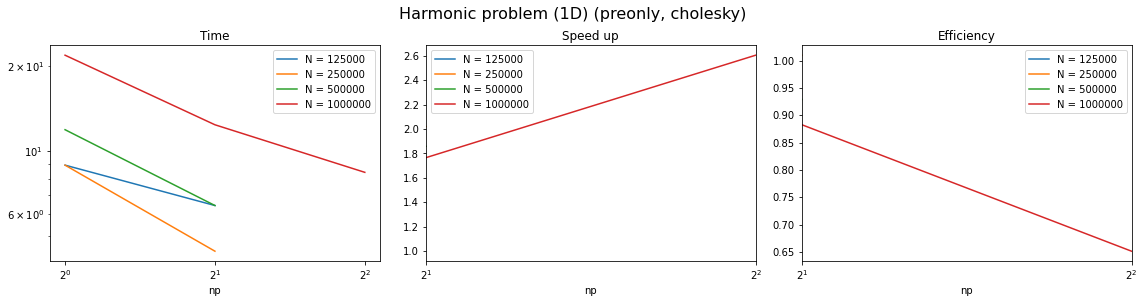

In [201]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_hg1d.index.get_level_values(0).unique():
    f3_hg1d.loc[idx]['Time'].plot(ax=axs[0], label=f'N = {idx}')
    f3_hg1d.loc[idx]['Speed up'].plot(ax=axs[1], label=f'N = {idx}')
    f3_hg1d.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'N = {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_hg1d.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Harmonic problem (1D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [132]:
f4_hg1d = df_hg1d.groupby(['solver', 'pc', 'N', 'np']).min()['L2_r']
f4_hg1d_diff = abs(f4_hg1d - f4_hg1d.loc[(slice(None), slice(None), slice(None), 1)])
f4_hg1d = f4_hg1d_diff / f4_hg1d.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_hg1d

solver   pc        N        np
gcr      asm       125000   1     0.000000
                            2     0.006685
                   250000   1     0.000000
                            2     0.006685
                   500000   1     0.000000
                            2     0.006685
                   1000000  1     0.000000
                            2     0.006685
                            4     0.006685
         bjacobi   500000   1     0.000000
                            2     0.012109
         cholesky  500000   1     0.000000
                            2     0.000095
         lu        500000   1     0.000000
                            2     0.000166
gmres    asm       500000   1     0.000000
                            2     0.157468
         bjacobi   500000   1     0.000000
         cholesky  500000   1     0.000000
                            2     0.000001
         lu        500000   1     0.000000
                            2     0.000002
preonly  asm       5000

## 2D Results

In [99]:
df_hg2d = pd.read_csv('./harmonic-grid_conv_2d.csv', sep=';')
df_hg2d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,19.60
1,preonly,cholesky,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,7.19
2,preonly,lu,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,17.11
3,preonly,lu,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,8.35
4,preonly,bjacobi,80,1,1.481965e-18,9.014960e-14,1.532234e-20,9.300999e-16,4.29


In [100]:
valid_L2_hg2d = df_hg2d.iloc[df_hg2d.loc[(df_hg2d['solver'] == 'preonly') 
                                         & (df_hg2d['pc'] == 'lu')]['N'].idxmax()]['L2_r']
valid_L2_hg2d

3.0260139658148874e-16

In [101]:
df_hg2d = df_hg2d[np.isclose(df_hg2d['L2_r'], valid_L2_hg2d, atol=1e-17)]
df_hg2d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,19.60
1,preonly,cholesky,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,7.19
2,preonly,lu,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,17.11
3,preonly,lu,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,8.35
8,gmres,cholesky,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,19.00


In [102]:
N = 80
f1_hg2d = df_hg2d.loc[df_hg2d['N'] == N]
f1_hg2d.head()

,solver,pc,N,np,L2_r,H1_r,L2_c,H1_c,time
0,preonly,cholesky,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,19.60
1,preonly,cholesky,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,7.19
2,preonly,lu,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,17.11
3,preonly,lu,80,2,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,8.35
8,gmres,cholesky,80,1,3.026014e-16,1.379569e-12,2.963019e-17,1.393269e-13,19.00


In [103]:
f2_hg2d = f1_hg2d.pivot_table(values=['time'], 
                              columns=['np'], 
                              index=['solver', 'pc'], 
                              aggfunc='min').loc[:, 'time']
f2_hg2d

np                    1     2
solver  pc                   
gcr     cholesky  13.26  4.48
        lu        10.45  5.15
gmres   cholesky  19.00  7.71
        lu        16.02  9.02
preonly cholesky  19.60  7.19
        lu        17.11  8.35

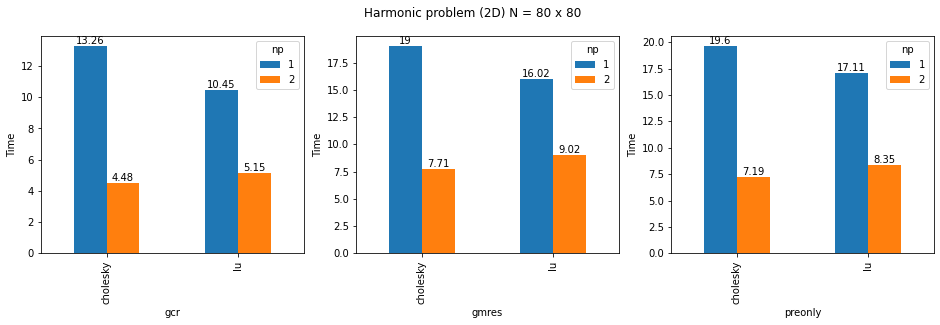

In [104]:
solvers = f2_hg2d.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Harmonic problem (2D) N = {N} x {N}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_hg2d.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [105]:
f3_solver, f3_pc = 'gcr', 'cholesky'

In [106]:
f3_col1 = df_hg2d.groupby(['solver', 'pc', 'N', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_hg2d = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_hg2d.columns = ['Time', 'Speed up', 'Efficiency']

f3_hg2d

Time  Speed up  Efficiency
N  np                             
80 1   13.26  1.000000    1.000000
   2    4.48  2.959821    1.479911

/tmp/ipykernel_3467/355634280.py:17: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[1].set_xlim([2, xticks[-1]])
/tmp/ipykernel_3467/355634280.py:18: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[2].set_xlim([2, xticks[-1]])


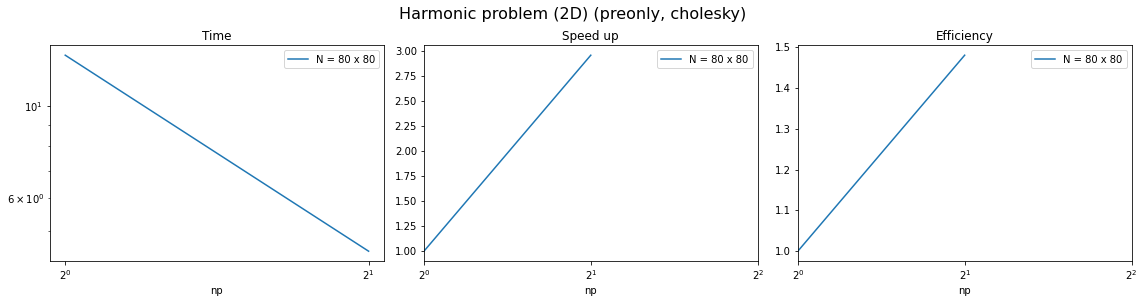

In [200]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_hg2d.index.get_level_values(0).unique():
    f3_hg2d.loc[idx]['Time'].plot(ax=axs[0], label=f'N = {idx} x {idx}')
    f3_hg2d.loc[idx]['Speed up'].plot(ax=axs[1], label=f'N = {idx} x {idx}')
    f3_hg2d.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'N = {idx} x {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_hg2d.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Harmonic problem (2D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [133]:
f4_hg2d = df_hg2d.groupby(['solver', 'pc', 'N', 'np']).min()['L2_r']
f4_hg2d_diff = abs(f4_hg2d - f4_hg2d.loc[(slice(None), slice(None), slice(None), 1)])
f4_hg2d = f4_hg2d_diff / f4_hg2d.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_hg2d

solver   pc        N   np
gcr      cholesky  80  1     0.000000e+00
                       2     4.887995e-14
         lu        80  1     0.000000e+00
                       2     6.680260e-13
gmres    cholesky  80  1     0.000000e+00
                       2     2.704691e-12
         lu        80  1     0.000000e+00
                       2     7.657859e-13
preonly  cholesky  80  1     0.000000e+00
                       2     5.376795e-13
         lu        80  1     0.000000e+00
                       2     7.983726e-13
Name: L2_r, dtype: float64

# Time domain problem

## Mesh densification (1D)

In [134]:
df_td1d_m = pd.read_csv('./grid_conv_1d.csv', sep=';')
df_td1d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,51200,1,1.031786e-13,2.106507e-11,12.87
1,preonly,cholesky,51200,2,1.031786e-13,2.106507e-11,92.34
2,preonly,lu,51200,1,1.031786e-13,2.106507e-11,12.23
3,preonly,lu,51200,2,1.031786e-13,2.106507e-11,84.04
4,preonly,bjacobi,51200,1,1.031786e-13,2.106507e-11,14.00


In [135]:
valid_L2_td1d_m = df_td1d_m.iloc[df_td1d_m.loc[(df_td1d_m['solver'] == 'preonly') 
                                             & (df_td1d_m['pc'] == 'lu')]['N'].idxmax()]['L2']
valid_L2_td1d_m

1.031785505591322e-13

In [137]:
df_td1d_m = df_td1d_m[np.isclose(df_td1d_m['L2'], valid_L2_td1d_m, atol=1e-14)]
df_td1d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,51200,1,1.031786e-13,2.106507e-11,12.87
1,preonly,cholesky,51200,2,1.031786e-13,2.106507e-11,92.34
2,preonly,lu,51200,1,1.031786e-13,2.106507e-11,12.23
3,preonly,lu,51200,2,1.031786e-13,2.106507e-11,84.04
4,preonly,bjacobi,51200,1,1.031786e-13,2.106507e-11,14.00


In [139]:
N = 51200
f1_td1d_m = df_td1d_m.loc[df_td1d_m['N'] == N]
f1_td1d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,51200,1,1.031786e-13,2.106507e-11,12.87
1,preonly,cholesky,51200,2,1.031786e-13,2.106507e-11,92.34
2,preonly,lu,51200,1,1.031786e-13,2.106507e-11,12.23
3,preonly,lu,51200,2,1.031786e-13,2.106507e-11,84.04
4,preonly,bjacobi,51200,1,1.031786e-13,2.106507e-11,14.00


In [141]:
f2_td1d_m = f1_td1d_m.pivot_table(values=['time'], 
                                  columns=['np'], 
                                  index=['solver', 'pc'], 
                                  aggfunc='min').loc[:, 'time']
f2_td1d_m

np                    1       2
solver  pc                     
gcr     asm       14.75   17.91
        bjacobi   18.22   15.12
        cholesky  14.64   90.24
        lu        13.00   89.20
gmres   asm       14.64   14.08
        bjacobi   13.27   14.66
        cholesky  14.37  169.42
        lu        14.70  173.31
preonly asm       15.50     NaN
        bjacobi   14.00     NaN
        cholesky  12.87   92.34
        lu        12.23   84.04

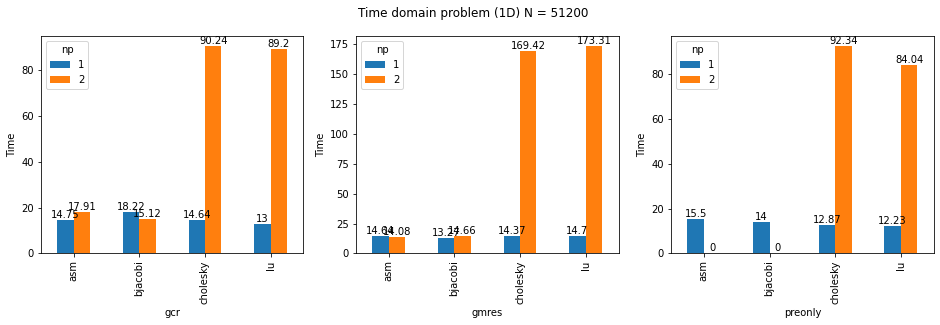

In [142]:
solvers = f2_td1d_m.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Time domain problem (1D) N = {N}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_td1d_m.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [143]:
f3_solver, f3_pc = 'gcr', 'asm'

In [144]:
f3_col1 = df_td1d_m.groupby(['solver', 'pc', 'N', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_td1d_m = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_td1d_m.columns = ['Time', 'Speed up', 'Efficiency']

f3_td1d_m

Time  Speed up  Efficiency
N     np                             
51200 1   14.75  1.000000    1.000000
      2   17.91  0.823562    0.411781

/tmp/ipykernel_3467/825313745.py:17: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[1].set_xlim([2, xticks[-1]])
/tmp/ipykernel_3467/825313745.py:18: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[2].set_xlim([2, xticks[-1]])


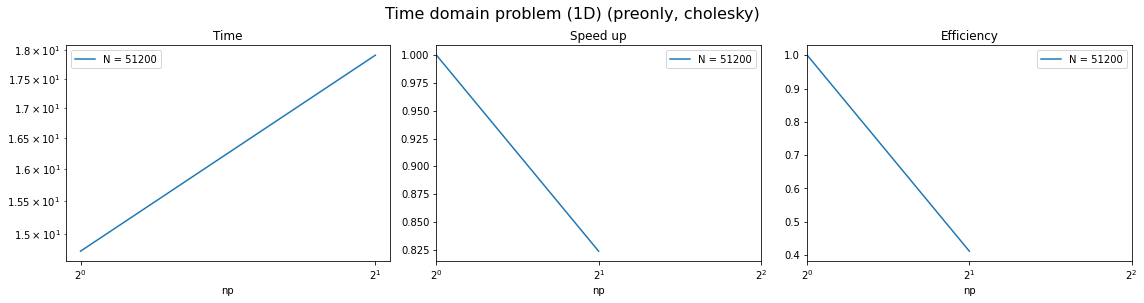

In [199]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_td1d_m.index.get_level_values(0).unique():
    f3_td1d_m.loc[idx]['Time'].plot(ax=axs[0], label=f'N = {idx}')
    f3_td1d_m.loc[idx]['Speed up'].plot(ax=axs[1], label=f'N = {idx}')
    f3_td1d_m.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'N = {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_td1d_m.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Time domain problem (1D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [150]:
f4_td1d_m = df_td1d_m.groupby(['solver', 'pc', 'N', 'np']).min()['L2']
f4_td1d_m_diff = abs(f4_td1d_m - f4_td1d_m.loc[(slice(None), slice(None), slice(None), 1)])
f4_td1d_m = f4_td1d_m_diff / f4_td1d_m.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_td1d_m

solver   pc        N      np
gcr      asm       51200  1     0.000000e+00
                          2     3.321085e-02
         bjacobi   51200  1     0.000000e+00
                          2     2.798477e-02
         cholesky  51200  1     0.000000e+00
                          2     2.122416e-11
         lu        51200  1     0.000000e+00
                          2     3.015421e-11
gmres    asm       51200  1     0.000000e+00
                          2     5.117668e-03
         bjacobi   51200  1     0.000000e+00
                          2     1.748522e-02
         cholesky  51200  1     0.000000e+00
                          2     1.459146e-10
         lu        51200  1     0.000000e+00
                          2     9.413251e-11
preonly  asm       51200  1     0.000000e+00
         bjacobi   51200  1     0.000000e+00
         cholesky  51200  1     0.000000e+00
                          2     2.089387e-11
         lu        51200  1     0.000000e+00
                          

## Mesh densification (2D)

In [151]:
df_td2d_m = pd.read_csv('./grid_conv_2d.csv', sep=';')
df_td2d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,40,1,2.988246e-15,1.946160e-12,13.73
1,preonly,cholesky,40,2,2.988246e-15,1.946160e-12,18.07
2,preonly,lu,40,1,2.988246e-15,1.946160e-12,12.97
3,preonly,lu,40,2,2.988246e-15,1.946160e-12,22.17
4,preonly,bjacobi,40,1,1.519177e-15,1.607108e-12,8.13


In [152]:
valid_L2_td2d_m = df_td2d_m.iloc[df_td2d_m.loc[(df_td2d_m['solver'] == 'preonly') 
                                             & (df_td2d_m['pc'] == 'lu')]['N'].idxmax()]['L2']
valid_L2_td2d_m

2.988245526216024e-15

In [154]:
df_td2d_m = df_td2d_m[np.isclose(df_td2d_m['L2'], valid_L2_td2d_m, atol=1e-16)]
df_td2d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,40,1,2.988246e-15,1.946160e-12,13.73
1,preonly,cholesky,40,2,2.988246e-15,1.946160e-12,18.07
2,preonly,lu,40,1,2.988246e-15,1.946160e-12,12.97
3,preonly,lu,40,2,2.988246e-15,1.946160e-12,22.17
8,gmres,cholesky,40,1,2.988246e-15,1.946160e-12,18.00


In [155]:
N = 40
f1_td2d_m = df_td2d_m.loc[df_td2d_m['N'] == N]
f1_td2d_m.head()

,solver,pc,N,np,L2,H1,time
0,preonly,cholesky,40,1,2.988246e-15,1.946160e-12,13.73
1,preonly,cholesky,40,2,2.988246e-15,1.946160e-12,18.07
2,preonly,lu,40,1,2.988246e-15,1.946160e-12,12.97
3,preonly,lu,40,2,2.988246e-15,1.946160e-12,22.17
8,gmres,cholesky,40,1,2.988246e-15,1.946160e-12,18.00


In [156]:
f2_td2d_m = f1_td2d_m.pivot_table(values=['time'], 
                                  columns=['np'], 
                                  index=['solver', 'pc'], 
                                  aggfunc='min').loc[:, 'time']
f2_td2d_m

np                    1      2
solver  pc                    
gcr     cholesky  14.31  19.60
        lu        14.17  21.23
gmres   cholesky  18.00  29.53
        lu        20.25  29.46
preonly cholesky  13.73  18.07
        lu        12.97  22.17

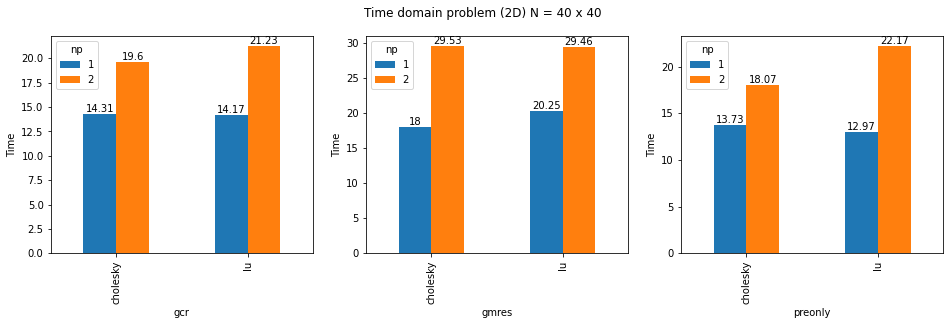

In [157]:
solvers = f2_td2d_m.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Time domain problem (2D) N = {N} x {N}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_td2d_m.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [158]:
f3_solver, f3_pc = 'preonly', 'lu'

In [159]:
f3_col1 = df_td2d_m.groupby(['solver', 'pc', 'N', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_td2d_m = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_td2d_m.columns = ['Time', 'Speed up', 'Efficiency']

f3_td2d_m

Time  Speed up  Efficiency
N  np                             
40 1   12.97  1.000000    1.000000
   2   22.17  0.585025    0.292512

/tmp/ipykernel_3467/463134097.py:17: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[1].set_xlim([2, xticks[-1]])
/tmp/ipykernel_3467/463134097.py:18: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[2].set_xlim([2, xticks[-1]])


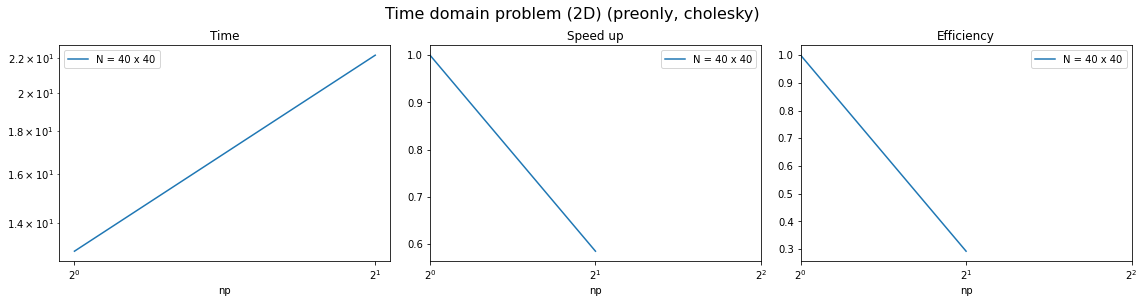

In [198]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_td2d_m.index.get_level_values(0).unique():
    f3_td2d_m.loc[idx]['Time'].plot(ax=axs[0], label=f'N = {idx} x {idx}')
    f3_td2d_m.loc[idx]['Speed up'].plot(ax=axs[1], label=f'N = {idx} x {idx}')
    f3_td2d_m.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'N = {idx} x {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_td2d_m.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Time domain problem (2D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [162]:
f4_td2d_m = df_td2d_m.groupby(['solver', 'pc', 'N', 'np']).min()['L2']
f4_td2d_m_diff = abs(f4_td2d_m - f4_td2d_m.loc[(slice(None), slice(None), slice(None), 1)])
f4_td2d_m = f4_td2d_m_diff / f4_td2d_m.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_td2d_m

solver   pc        N   np
gcr      cholesky  40  1     0.000000e+00
                       2     2.111904e-13
         lu        40  1     0.000000e+00
                       2     2.375892e-13
gmres    cholesky  40  1     0.000000e+00
                       2     7.919639e-14
         lu        40  1     0.000000e+00
                       2     1.319940e-13
preonly  cholesky  40  1     0.000000e+00
                       2     2.507886e-13
         lu        40  1     0.000000e+00
                       2     2.375892e-13
Name: L2, dtype: float64

## Shrinking of time itegration step  (1D)

In [163]:
df_td1d_t = pd.read_csv('./time_conv_1d.csv', sep=';')
df_td1d_t.head()

,solver,pc,dt,np,L2,H1,time
0,preonly,cholesky,2.000000e-07,1,9.652849e-14,2.034659e-11,9.03
1,preonly,cholesky,2.000000e-07,2,9.652849e-14,2.034659e-11,4.32
2,preonly,cholesky,1.000000e-07,1,1.036781e-13,2.103758e-11,2.39
3,preonly,cholesky,1.000000e-07,2,1.036781e-13,2.103758e-11,3.59
4,preonly,cholesky,5.000000e-08,1,1.036812e-13,2.107018e-11,2.07


In [164]:
valid_L2_td1d_t = df_td1d_t.iloc[df_td1d_t.loc[(df_td1d_t['solver'] == 'preonly') 
                                             & (df_td1d_t['pc'] == 'lu')]['dt'].idxmin()]['L2']
valid_L2_td1d_t

1.0278823899567933e-13

In [183]:
df_td1d_t = df_td1d_t[np.isclose(df_td1d_t['L2'], valid_L2_td1d_t, atol=1e-14)]
df_td1d_t.head()

,solver,pc,dt,np,L2,H1,time
0,preonly,cholesky,2.000000e-07,1,9.652849e-14,2.034659e-11,9.03
1,preonly,cholesky,2.000000e-07,2,9.652849e-14,2.034659e-11,4.32
2,preonly,cholesky,1.000000e-07,1,1.036781e-13,2.103758e-11,2.39
3,preonly,cholesky,1.000000e-07,2,1.036781e-13,2.103758e-11,3.59
4,preonly,cholesky,5.000000e-08,1,1.036812e-13,2.107018e-11,2.07


In [169]:
dt = 1.25e-08
f1_td1d_t = df_td1d_t.loc[df_td1d_t['dt'] == dt]
f1_td1d_t.head()

,solver,pc,dt,np,L2,H1,time
8,preonly,cholesky,1.250000e-08,1,1.027882e-13,2.098505e-11,3.37
9,preonly,cholesky,1.250000e-08,2,1.027882e-13,2.098505e-11,16.16
18,preonly,lu,1.250000e-08,1,1.027882e-13,2.098505e-11,2.79
19,preonly,lu,1.250000e-08,2,1.027882e-13,2.098505e-11,14.52
28,preonly,bjacobi,1.250000e-08,1,1.027882e-13,2.098505e-11,2.24


In [170]:
f2_td1d_t = f1_td1d_t.pivot_table(values=['time'], 
                                  columns=['np'], 
                                  index=['solver', 'pc'], 
                                  aggfunc='min').loc[:, 'time']
f2_td1d_t

np                   1      2
solver  pc                   
gcr     asm       2.20   3.00
        bjacobi   2.92   2.68
        cholesky  3.27  14.62
        lu        2.82  14.03
gmres   asm       2.34   2.81
        bjacobi   2.61   3.07
        cholesky  2.86  25.96
        lu        2.81  23.89
preonly asm       2.14   2.74
        bjacobi   2.24   3.07
        cholesky  3.37  16.16
        lu        2.79  14.52

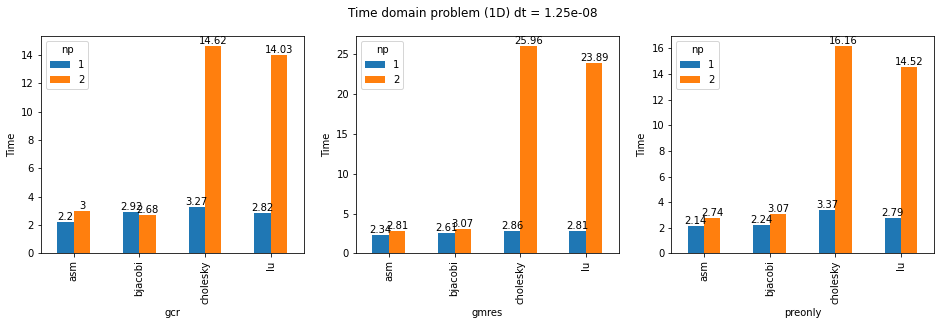

In [172]:
solvers = f2_td1d_t.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Time domain problem (1D) dt = {dt}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_td1d_t.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [173]:
f3_solver, f3_pc = 'gcr', 'asm'

In [174]:
f3_col1 = df_td1d_t.groupby(['solver', 'pc', 'dt', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_td1d_t = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_td1d_t.columns = ['Time', 'Speed up', 'Efficiency']

f3_td1d_t

Time  Speed up  Efficiency
dt           np                            
1.250000e-08 1   2.20  1.000000    1.000000
             2   3.00  0.733333    0.366667
2.500000e-08 1   1.76  1.000000    1.000000
             2   2.95  0.596610    0.298305
5.000000e-08 1   1.47  1.000000    1.000000
             2   3.03  0.485149    0.242574
1.000000e-07 1   1.76  1.000000    1.000000
             2   2.07  0.850242    0.425121
2.000000e-07 1   1.93  1.000000    1.000000
             2   1.94  0.994845    0.497423

/tmp/ipykernel_3467/1563164974.py:17: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[1].set_xlim([2, xticks[-1]])
/tmp/ipykernel_3467/1563164974.py:18: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[2].set_xlim([2, xticks[-1]])


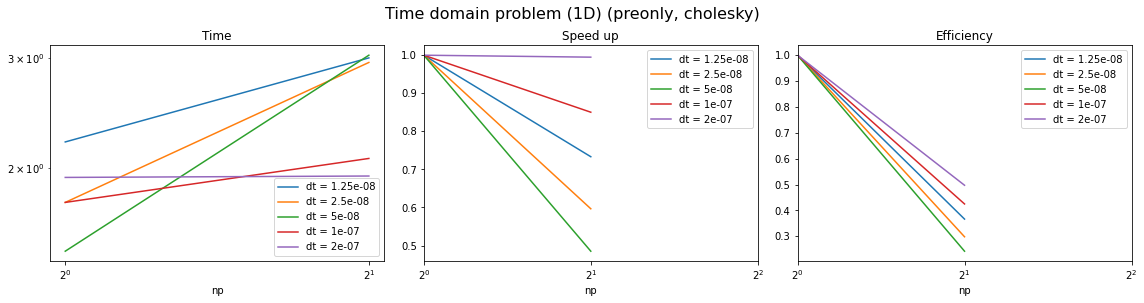

In [197]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_td1d_t.index.get_level_values(0).unique():
    f3_td1d_t.loc[idx]['Time'].plot(ax=axs[0], label=f'dt = {idx}')
    f3_td1d_t.loc[idx]['Speed up'].plot(ax=axs[1], label=f'dt = {idx}')
    f3_td1d_t.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'dt = {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_td1d_t.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Time domain problem (1D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [181]:
f4_td1d_t = df_td1d_t.groupby(['solver', 'pc', 'dt', 'np']).min()['L2']
f4_td1d_t_diff = abs(f4_td1d_t - f4_td1d_t.loc[(slice(None), slice(None), slice(None), 1)])
f4_td1d_t = f4_td1d_t_diff / f4_td1d_t.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_td1d_t

solver   pc   dt            np
gcr      asm  1.250000e-08  1     0.000000e+00
                            2     1.757999e-05
              2.500000e-08  1     0.000000e+00
                            2     1.591509e-04
              5.000000e-08  1     0.000000e+00
                                      ...     
preonly  lu   5.000000e-08  2     2.434728e-14
              1.000000e-07  1     0.000000e+00
                            2     3.652200e-14
              2.000000e-07  1     0.000000e+00
                            2     5.753308e-13
Name: L2, Length: 114, dtype: float64

## Shrinking of time itegration step (2D)

In [184]:
df_td2d_t = pd.read_csv('./time_conv_2d.csv', sep=';')
df_td2d_t.head()

,solver,pc,dt,np,L2,H1,time
0,preonly,cholesky,2.000000e-07,1,2.831351e-15,1.864516e-12,5.03
1,preonly,cholesky,2.000000e-07,2,2.831351e-15,1.864516e-12,7.72
2,preonly,cholesky,1.000000e-07,1,2.957607e-15,1.935517e-12,4.98
3,preonly,cholesky,1.000000e-07,2,2.957607e-15,1.935517e-12,7.04
4,preonly,cholesky,5.000000e-08,1,2.966132e-15,1.926524e-12,5.80


In [185]:
valid_L2_td2d_t = df_td2d_t.iloc[df_td2d_t.loc[(df_td2d_t['solver'] == 'preonly') 
                                             & (df_td2d_t['pc'] == 'lu')]['dt'].idxmin()]['L2']
valid_L2_td2d_t

2.9598670581369467e-15

In [186]:
df_td2d_t = df_td2d_t[np.isclose(df_td2d_t['L2'], valid_L2_td2d_t, atol=1e-16)]
df_td2d_t.head()

,solver,pc,dt,np,L2,H1,time
2,preonly,cholesky,1.000000e-07,1,2.957607e-15,1.935517e-12,4.98
3,preonly,cholesky,1.000000e-07,2,2.957607e-15,1.935517e-12,7.04
4,preonly,cholesky,5.000000e-08,1,2.966132e-15,1.926524e-12,5.80
5,preonly,cholesky,5.000000e-08,2,2.966132e-15,1.926524e-12,9.64
6,preonly,cholesky,2.500000e-08,1,2.970143e-15,1.964598e-12,8.66


In [187]:
dt = 1.25e-08
f1_td2d_t = df_td2d_t.loc[df_td2d_t['dt'] == dt]
f1_td2d_t.head()

,solver,pc,dt,np,L2,H1,time
8,preonly,cholesky,1.250000e-08,1,2.959867e-15,1.978729e-12,14.06
9,preonly,cholesky,1.250000e-08,2,2.959867e-15,1.978729e-12,22.80
18,preonly,lu,1.250000e-08,1,2.959867e-15,1.978729e-12,13.45
19,preonly,lu,1.250000e-08,2,2.959867e-15,1.978729e-12,24.90
48,gmres,cholesky,1.250000e-08,1,2.959867e-15,1.978729e-12,17.39


In [188]:
f2_td2d_t = f1_td2d_t.pivot_table(values=['time'], 
                                  columns=['np'], 
                                  index=['solver', 'pc'], 
                                  aggfunc='min').loc[:, 'time']
f2_td2d_t

np                    1      2
solver  pc                    
gcr     asm       20.88  28.24
        bjacobi   18.88  24.43
        cholesky  14.14  20.38
        lu        14.21  20.45
gmres   asm       19.26  19.92
        bjacobi   18.70  22.82
        cholesky  17.39  29.76
        lu        19.48  29.63
preonly cholesky  14.06  22.80
        lu        13.45  24.90

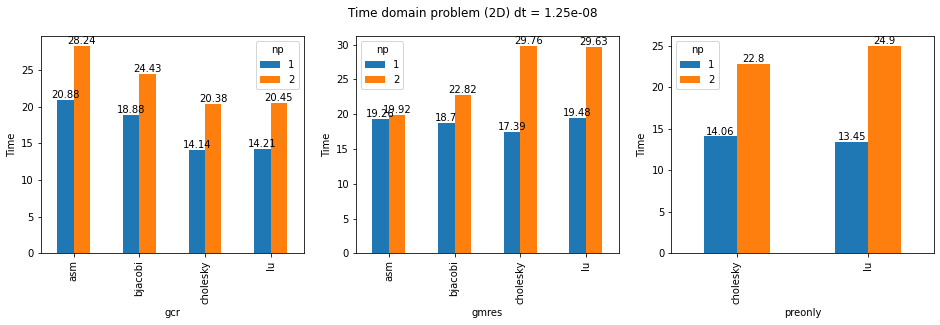

In [190]:
solvers = f2_td2d_t.index.get_level_values(0).unique()

ncols = 3
nrows = int(np.ceil(len(solvers) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,4))
fig.suptitle(f'Time domain problem (2D) dt = {dt}')#, y=0.92, fontsize=16)

for (solver, ax) in zip(solvers, axes.flatten()):
    f2_td2d_t.loc[solver].plot(ax=ax, kind='bar')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xlabel(solver)
    ax.set_ylabel('Time')
    
for i in range(1, ncols * nrows - len(solvers) + 1):
    axes[-1][-i].set_visible(False)

plt.show()

In [191]:
f3_solver, f3_pc = 'preonly', 'cholesky'

In [192]:
f3_col1 = df_td2d_t.groupby(['solver', 'pc', 'dt', 'np']).min().loc[f3_solver, f3_pc]['time']
f3_col2 = f3_col1.loc[(slice(None), 1)] / f3_col1
f3_col3 = f3_col2 / f3_col2.index.get_level_values(1)

f3_td2d_t = pd.concat([f3_col1, f3_col2, f3_col3], axis=1)
f3_td2d_t.columns = ['Time', 'Speed up', 'Efficiency']

f3_td2d_t

Time  Speed up  Efficiency
dt           np                             
1.250000e-08 1   14.06  1.000000    1.000000
             2   22.80  0.616667    0.308333
2.500000e-08 1    8.66  1.000000    1.000000
             2   15.98  0.541927    0.270964
5.000000e-08 1    5.80  1.000000    1.000000
             2    9.64  0.601660    0.300830
1.000000e-07 1    4.98  1.000000    1.000000
             2    7.04  0.707386    0.353693

/tmp/ipykernel_3467/2921527445.py:17: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[1].set_xlim([2, xticks[-1]])
/tmp/ipykernel_3467/2921527445.py:18: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  axs[2].set_xlim([2, xticks[-1]])


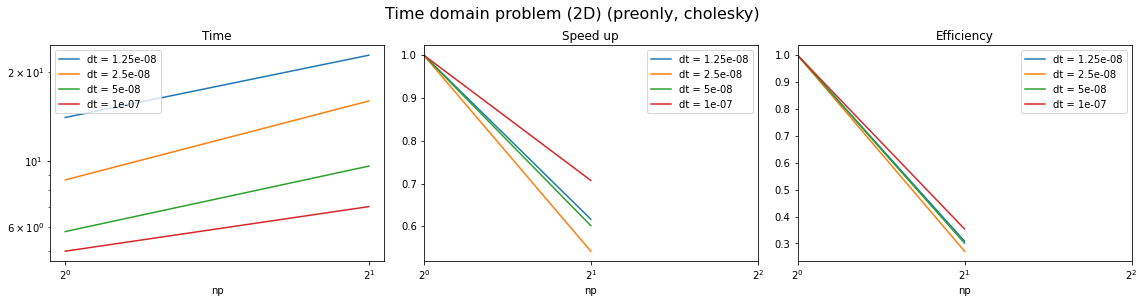

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for idx in f3_td2d_t.index.get_level_values(0).unique():
    f3_td2d_t.loc[idx]['Time'].plot(ax=axs[0], label=f'dt = {idx}')
    f3_td2d_t.loc[idx]['Speed up'].plot(ax=axs[1], label=f'dt = {idx}')
    f3_td2d_t.loc[idx]['Efficiency'].plot(ax=axs[2], label=f'dt = {idx}')

axs[0].set_yscale('log', base=10)
# axs[1].set_yscale('log', base=10)
# axs[2].set_yscale('log', base=10)

axs[0].set_xscale('log', base=2)
axs[1].set_xscale('log', base=2)
axs[2].set_xscale('log', base=2)

xticks = f3_td2d_t.index.get_level_values(1).unique()

axs[1].set_xlim([2, xticks[-1]])
axs[2].set_xlim([2, xticks[-1]])

axs[0].set_title('Time')
axs[1].set_title('Speed up')
axs[2].set_title('Efficiency')

axs[0].legend()
axs[1].legend()
axs[2].legend()

fig.tight_layout()
fig.suptitle(f"Time domain problem (2D) ({f3_solver}, {f3_pc})", y=1.04, fontsize=16)
fig.show()

In [194]:
f4_td2d_t = df_td2d_t.groupby(['solver', 'pc', 'dt', 'np']).min()['L2']
f4_td2d_t_diff = abs(f4_td2d_t - f4_td2d_t.loc[(slice(None), slice(None), slice(None), 1)])
f4_td2d_t = f4_td2d_t_diff / f4_td2d_t.loc[(slice(None), slice(None), slice(None), 1)] * 100
f4_td2d_t

solver   pc   dt            np
gcr      asm  1.250000e-08  1     0.000000e+00
                            2     4.309626e-04
              2.500000e-08  1     0.000000e+00
                            2     2.619985e-04
              5.000000e-08  1     0.000000e+00
                                      ...     
preonly  lu   2.500000e-08  2     1.327985e-14
              5.000000e-08  1     0.000000e+00
                            2     0.000000e+00
              1.000000e-07  1     0.000000e+00
                            2     4.000840e-14
Name: L2, Length: 80, dtype: float64